In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.decomposition import PCA

In [6]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')

labelsTrain = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,2], inplace = True)
labelsTrain.columns = ["img_name"  , "smiling"]
labelsTrain = labelsTrain.astype({'smiling': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/labels.csv')

labelsTest = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,2], inplace = True)
labelsTest.columns = ["img_name"  , "smiling"]
labelsTest = labelsTest.astype({'smiling': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})

In [12]:
#Load training set################################
imagesTrain = np.zeros((5000, 218, 178))

for i in range(0,5000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTrain[i] = image
    
imagesTrain = imagesTrain.reshape(5000,38804)    
imagesTrain = pd.DataFrame(imagesTrain) 


#Load Testing set################################
imagesTest = np.zeros((1000, 218, 178))

for i in range(0,1000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + labelsTest["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTest[i] = image
    
imagesTest = imagesTest.reshape(1000,38804)   

imagesTest = pd.DataFrame(imagesTest) 

In [39]:
model = tree.DecisionTreeClassifier(max_depth=6)

In [40]:
model.fit(imagesTrain[0:5000],labelsTrain['smiling'][0:5000])

DecisionTreeClassifier(max_depth=6)

In [41]:
model.score(imagesTest[0:1000],labelsTest['smiling'][0:1000])

0.816

In [42]:
# image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + '0.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# plt.imshow(image , cmap='gray', vmin=0, vmax=255)
# plt.show()

In [43]:
#images = list(zip(images))
#images = pd.DataFrame(images,columns=["images"])
#labels = labels.assign(images = images)

In [44]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

[Text(0.5309579439252337, 0.9285714285714286, 'X[31955] <= 136.5\ngini = 0.5\nsamples = 5000\nvalue = [2500, 2500]'),
 Text(0.2733644859813084, 0.7857142857142857, 'X[26984] <= 93.5\ngini = 0.411\nsamples = 2450\nvalue = [1741, 709]'),
 Text(0.14719626168224298, 0.6428571428571429, 'X[31424] <= 90.5\ngini = 0.5\nsamples = 966\nvalue = [490, 476]'),
 Text(0.07476635514018691, 0.5, 'X[24455] <= 76.5\ngini = 0.369\nsamples = 442\nvalue = [334, 108]'),
 Text(0.037383177570093455, 0.35714285714285715, 'X[23201] <= 83.5\ngini = 0.481\nsamples = 82\nvalue = [33, 49]'),
 Text(0.018691588785046728, 0.21428571428571427, 'X[10234] <= 10.5\ngini = 0.424\nsamples = 36\nvalue = [25, 11]'),
 Text(0.009345794392523364, 0.07142857142857142, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.028037383177570093, 0.07142857142857142, 'gini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.056074766355140186, 0.21428571428571427, 'X[27125] <= 95.0\ngini = 0.287\nsamples = 46\nvalue = [8, 38]'),
 Text(0.04

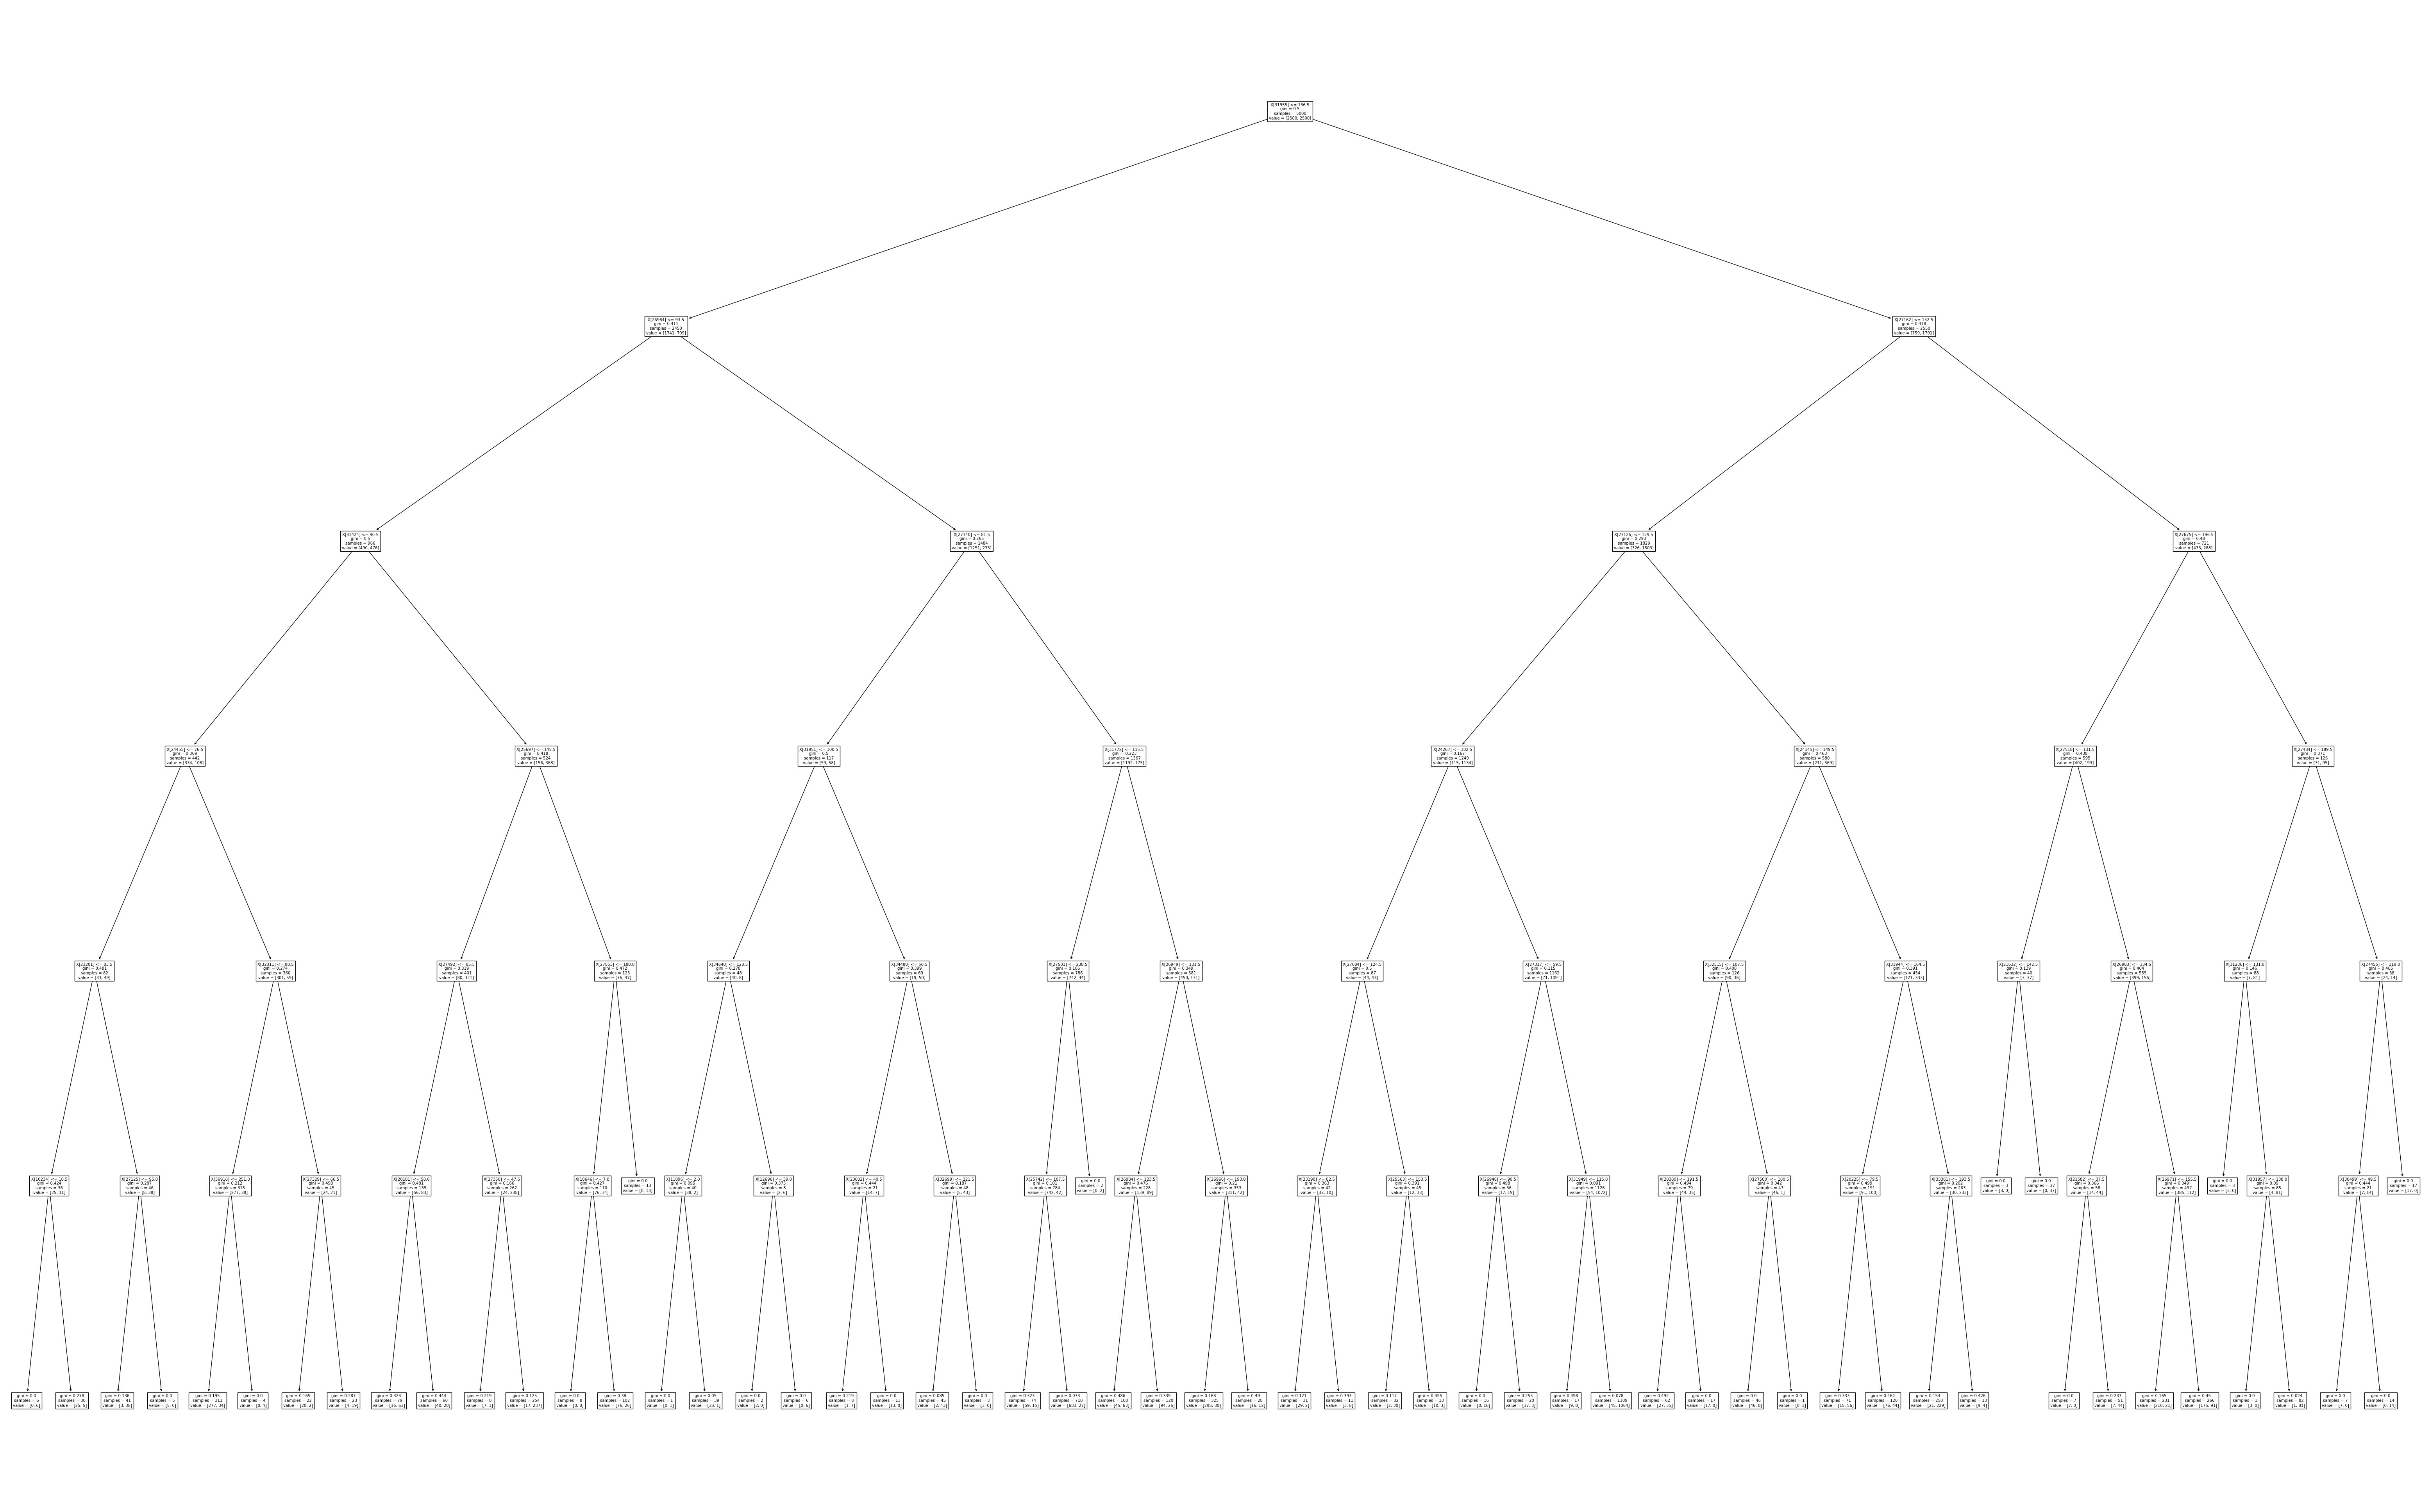

In [45]:
plot_tree(model)